In [ ]:
#Import thư viện
import pandas as pd    #Using for data manipulation
import pymssql         #Using for connect to mssql server
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

# Data Overview


In [ ]:
#Define stats server
Server = '45.117.83.230'
Port = 1433
Account=  'Student_DA_Q1'
Password = '@MindXDream2023'
db = 'DA_FINALTEST'
#Create connection to server
connection = pymssql.connect(host = Server, port = Port, user = Account, password = Password, database = db)
query = 'SELECT * FROM [dbo].[Customer_Churn_Banker]'

df = pd.read_sql(query, connection)  #Query data from server to python
df.head()

<ipython-input-4-a6db1c6e8f9e>:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)  #Query data from server to python


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,10134888.0,1
1,15647311,608,Spain,Female,41,1,8380786.0,1,0,1,11254258.0,0
2,15619304,502,France,Female,42,8,1596608.0,3,1,0,11393157.0,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,9382663.0,0
4,15737888,850,Spain,Female,43,2,12551082.0,1,1,1,790841.0,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# Data Cleaning

In [ ]:
# Check NA value
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
# Check duplicated data
df.duplicated().sum()

0

In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,6.980471e+06,1.530200,0.70550,0.515100,9.089385e+06,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,6.285896e+06,0.581654,0.45584,0.499797,6.128208e+06,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000,5.230000e+02,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000e+00,1.000000,0.00000,0.000000,3.336751e+06,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,8.668510e+06,1.000000,1.00000,1.000000,8.890572e+06,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,1.246215e+07,2.000000,1.00000,1.000000,1.439529e+07,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,2.508981e+07,4.000000,1.00000,1.000000,1.999925e+07,1.000000


# EDA

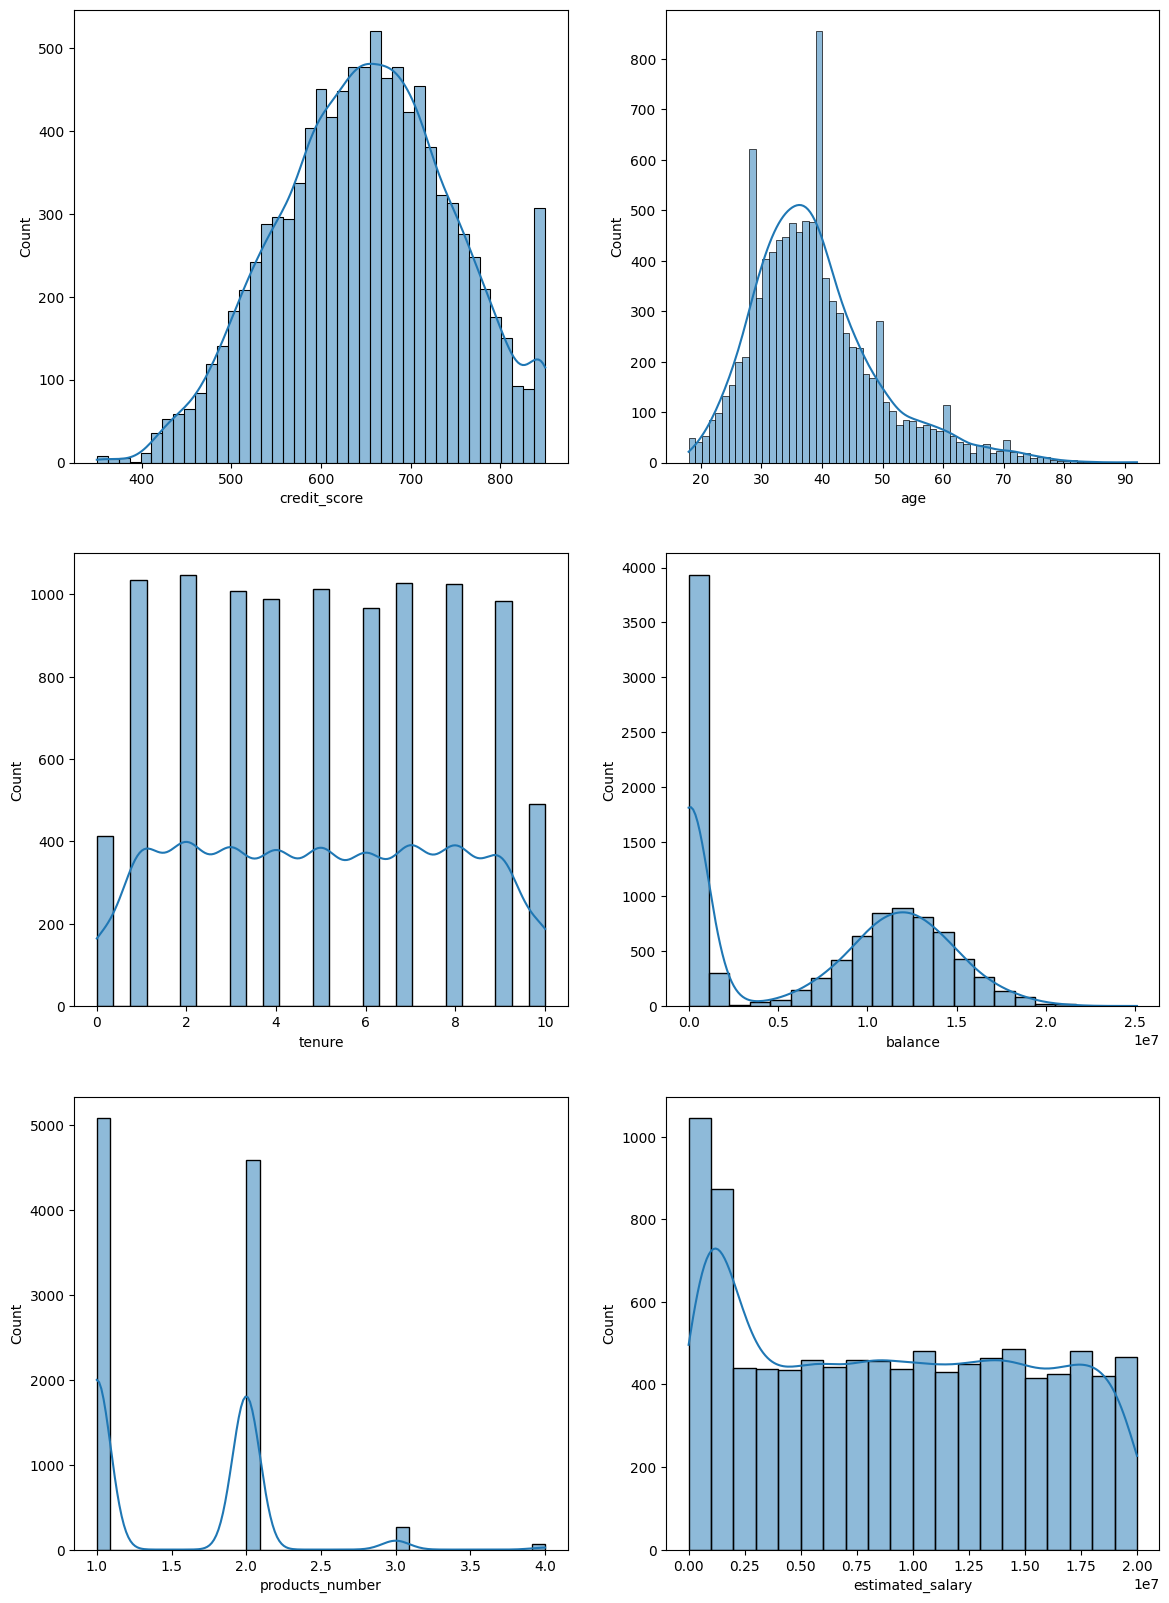

In [ ]:
num_col = []
for col in df.columns:
    if df[col].dtype != 'object' and col not in ['customer_id', 'credit_card', 'active_member', 'churn']:
        num_col.append(col)
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (14, 20))
for i, column in enumerate(num_col):
        row = i//2
        col = i%2
        ax = axes[row, col]
        sns.histplot(data= df[column], ax = ax, kde= True)
plt.show()

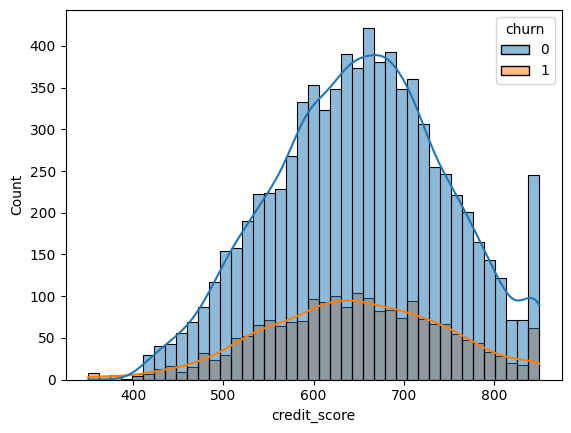

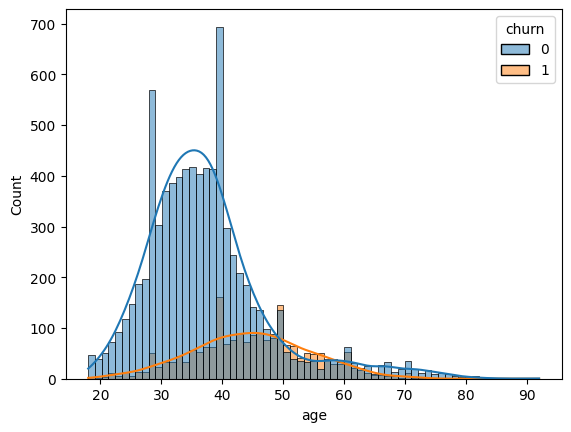

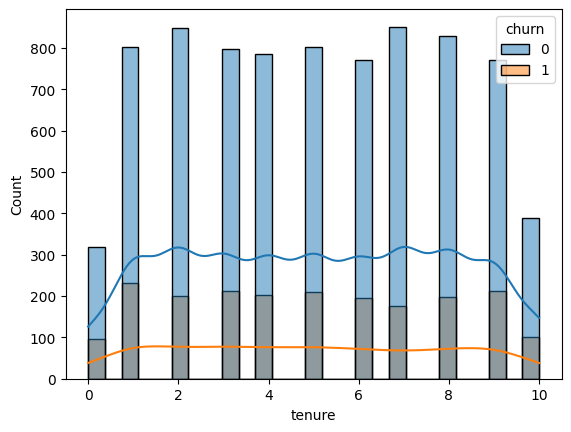

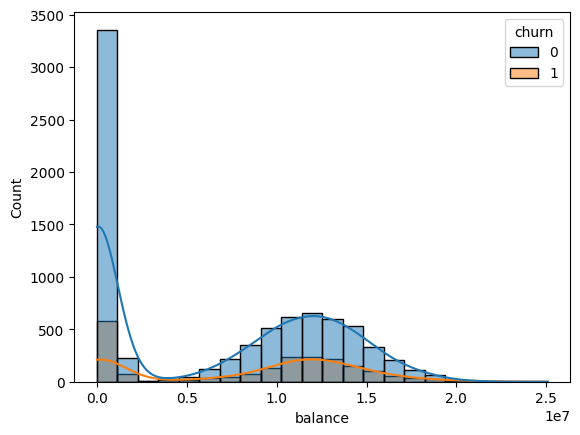

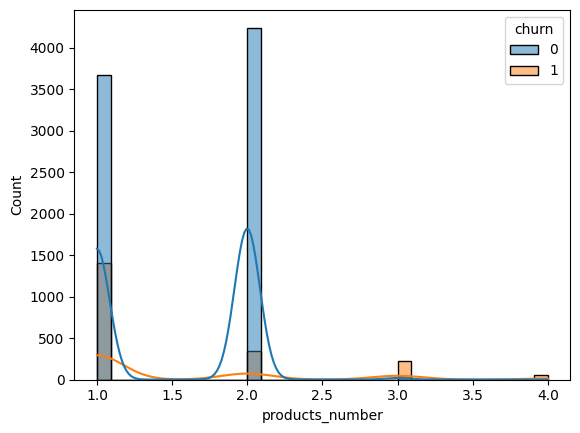

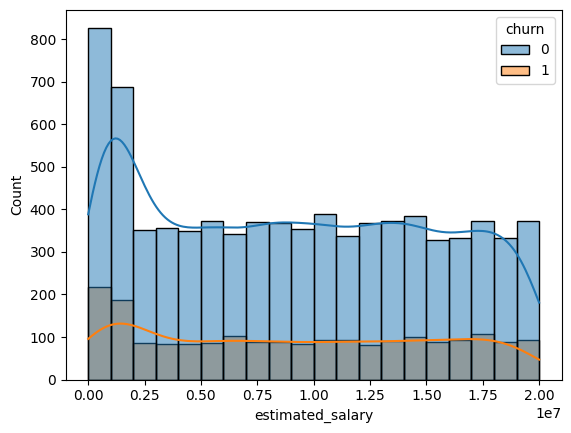

In [ ]:
for i in num_col:
    sns.histplot (data = df, x= i, kde = True, hue = 'churn' )
    plt.show()

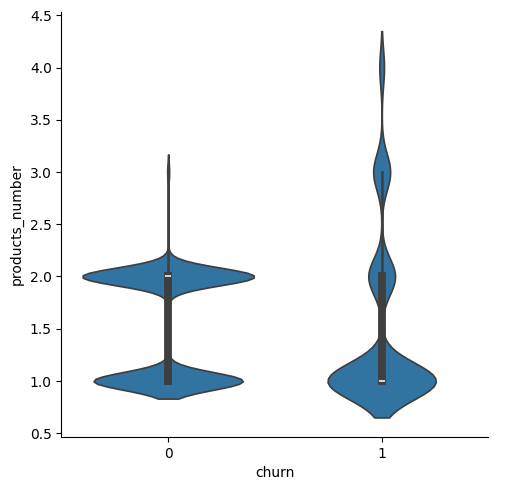

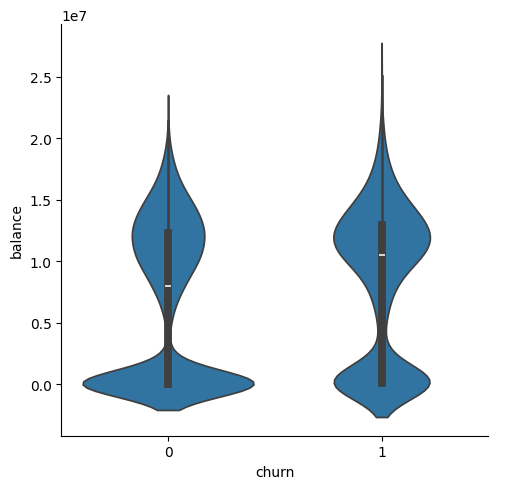

In [ ]:
sns.catplot(data=df, x="churn", y="products_number", kind="violin")
sns.catplot(data=df, x="churn", y="balance", kind="violin")

In [ ]:
cat_col = [i for i in df.columns if df[i].dtype == 'object']
cat_col

['country', 'gender']

<Figure size 1000x2000 with 0 Axes>

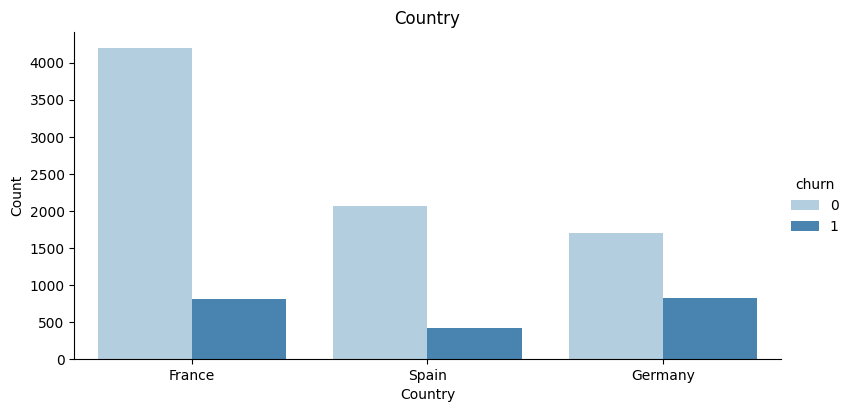

In [ ]:
plt.figure(figsize = (10, 20))
sns.catplot(x = 'country',data = df, kind = "count", hue = 'churn', palette = "Blues",  height=4, aspect=2)
plt.title('Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

<Figure size 1000x2000 with 0 Axes>

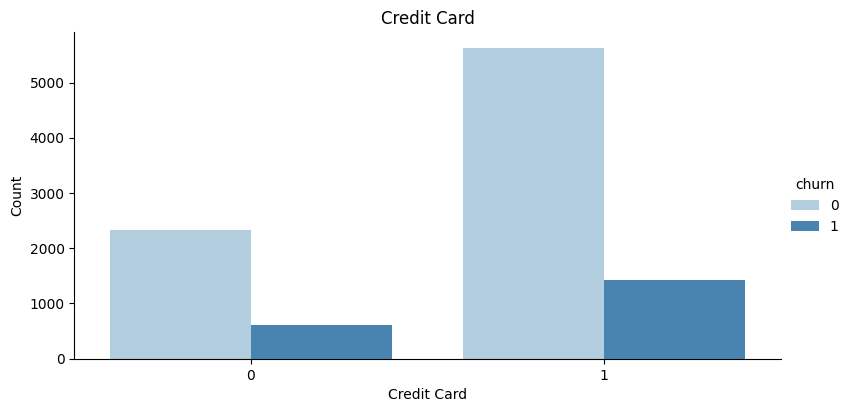

In [ ]:
plt.figure(figsize = (10, 20))
sns.catplot(x = 'credit_card',data = df, kind = "count", hue = 'churn', palette = "Blues",  height=4, aspect=2)
plt.title('Credit Card')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.show()

<Figure size 1000x2000 with 0 Axes>

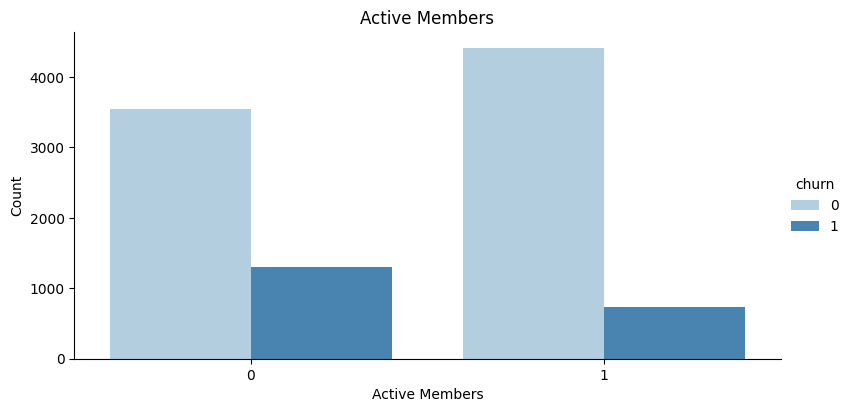

In [ ]:
plt.figure(figsize = (10, 20))
sns.catplot(x = 'active_member',data = df, kind = "count", hue = 'churn', palette = "Blues",  height=4, aspect=2)
plt.title('Active Members')
plt.xlabel('Active Members')
plt.ylabel('Count')
plt.show()

<Figure size 1000x2000 with 0 Axes>

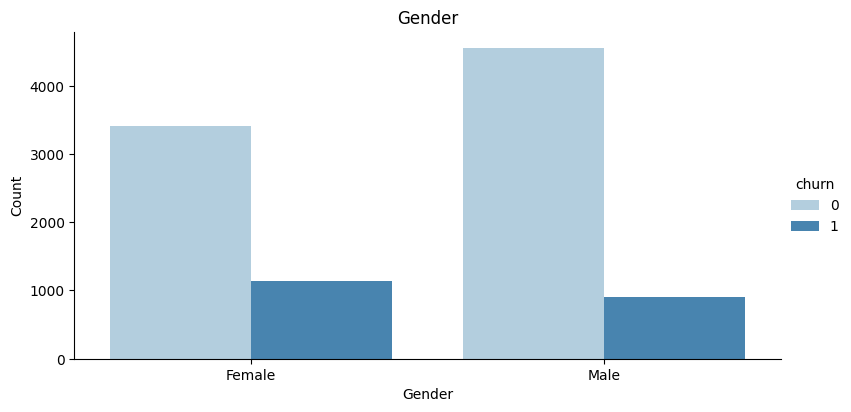

In [ ]:
plt.figure(figsize = (10, 20))
sns.catplot(x = 'gender',data = df, kind = "count", hue = 'churn', palette = "Blues",  height=4, aspect=2)
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Encoding

In [ ]:
df['gender'] = df['gender'].astype(str)

In [ ]:
df['gender'] = df['gender'].map({'Male':1, 'Female':0})

In [ ]:
df['country'].unique()
range(df['country'].nunique())
df['country'] = df['country'].replace(df['country'].unique(), range(df['country'].nunique()))

In [ ]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.0,1,1,1,10134888.0,1
1,15647311,608,1,0,41,1,8380786.0,1,0,1,11254258.0,0
2,15619304,502,0,0,42,8,1596608.0,3,1,0,11393157.0,1
3,15701354,699,0,0,39,1,0.0,2,0,0,9382663.0,0
4,15737888,850,1,0,43,2,12551082.0,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.0,2,1,0,9627064.0,0
9996,15569892,516,0,1,35,10,5736961.0,1,1,1,10169977.0,0
9997,15584532,709,0,0,36,7,0.0,1,0,1,4208558.0,1
9998,15682355,772,2,1,42,3,7507531.0,2,1,0,9288852.0,1


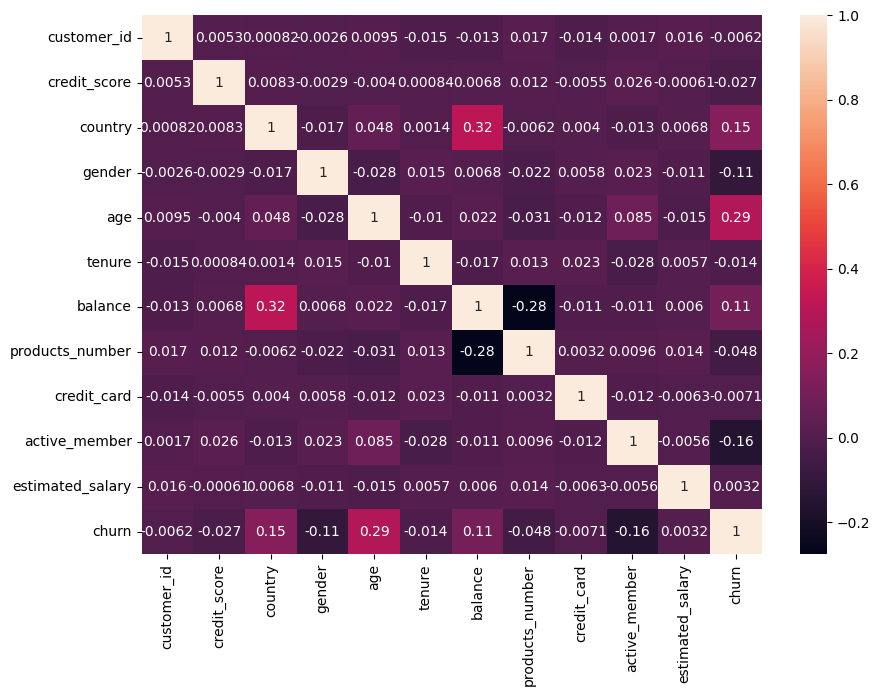

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,7))
corr_map = sns.heatmap(correlation, annot=True)

# Models

Logistic Regression

In [ ]:
X=df.drop(columns=['churn']).values
y=df['churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

In [ ]:
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{fold}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    fold += 1

Fold:1, Train set: 8000, Test set:2000
Fold:2, Train set: 8000, Test set:2000
Fold:3, Train set: 8000, Test set:2000
Fold:4, Train set: 8000, Test set:2000
Fold:5, Train set: 8000, Test set:2000


In [ ]:
# import model
model_lg = LogisticRegression()
# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)
score = cross_validate(model_lg, X, y, cv=kf, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'], return_estimator=True)
score
# Đánh giá mô hình
# 1. Độ chính xác (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)
# 2. Báo cáo phân loại (Classification Report)
report = classification_report(y_test, y_pred)
print(report)
# 3. AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)
# 4.Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Độ chính xác: 0.813
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.21      0.31       393

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000

AUC: 0.5856850832315996
Confusion Matrix:
 [[1543   64]
 [ 310   83]]


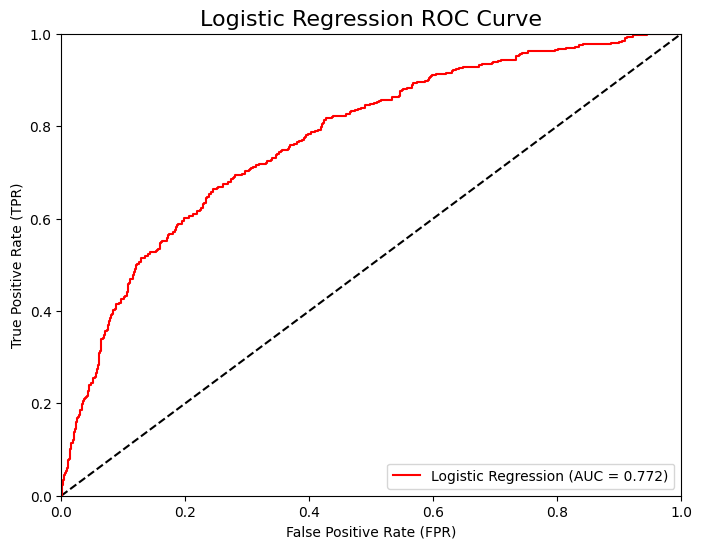

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = model_lg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Vẽ ROC curve
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.3f)' % roc_auc, color="r")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()

Support Vector Classification

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
# Chọn các đặc điểm và biến mục tiêu
X = df.drop(columns=['churn']).values
y = df['churn'].values
# Chuẩn hóa đặc điểm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Chuẩn hóa đặc điểm
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Tạo và huấn luyện mô hình SVM
model = SVC(kernel='linear')  # Experiment with different kernels
model.fit(X_train, y_train)
# Dự đoán trên tập dữ liệu kiểm tra
y_pred = model.predict(X_test)
# Đánh giá mô hình
# 1. Độ chính xác (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)
# 2. Báo cáo phân loại (Classification Report)
report = classification_report(y_test, y_pred)
print(report)
# 3. AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)
# 4.Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", confusion)


Độ chính xác: 0.8035
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

AUC: 0.5
Confusion matrix:
 [[1607    0]
 [ 393    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
# Chọn các đặc điểm và biến mục tiêu
X = df.drop(columns=['churn']).values
y = df['churn'].values
# Chuẩn hóa đặc điểm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Chuẩn hóa đặc điểm
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Tạo và huấn luyện mô hình XGBoost
model = XGBClassifier()
model.fit(X_train, y_train)
# Dự đoán trên tập dữ liệu kiểm tra
y_pred = model.predict(X_test)
# Đánh giá mô hình
# 1. Độ chính xác (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)
# 2. Báo cáo phân loại (Classification Report)
report = classification_report(y_test, y_pred)
print(report)
# 3. AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)
# 4.Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)


Độ chính xác: 0.8615
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

AUC: 0.7302395214321566
Confusion Matrix:
 [[1521   86]
 [ 191  202]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
# Chọn các đặc điểm và biến mục tiêu
X = df.drop(columns=['churn']).values
y = df['churn'].values
# Chuẩn hóa đặc điểm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Chuẩn hóa đặc điểm
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Tạo và huấn luyện mô hình LightGBM
model = LGBMClassifier()
model.fit(X_train, y_train)
# Dự đoán trên tập dữ liệu kiểm tra
y_pred = model.predict(X_test)
# Đánh giá mô hình

# 1. Độ chính xác (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)
# 2. Báo cáo phân loại (Classification Report)
report = classification_report(y_test, y_pred)
print(report)

# 3. AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# 4.Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)


[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1116
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
Độ chính xác: 0.87
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.75      0.51      0.61       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

AUC: 0.7336066287599893
Confusion Matrix:
 [[1540   67]
 [ 193  200]]


**Nhận xét:** Mô hình có độ chính xác cao nhât khi sử dụng LightGBM(87%), ROC curve và chỉ số AUC cho thấy mô hình logistic regression có hiệu suất tốt trong việc phân biệt các trường hợp dương tính với các trường hợp âm tính. Tuy nhiên, vẫn cần cải thiện độ chính xác của mô hình